In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df_train = pd.read_csv('dataset_train.csv', index_col='Index')

In [4]:
df_train.head()

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [5]:
df_train.describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [6]:
df_test = pd.read_csv('dataset_test.csv', index_col='Index')
df_test.head()

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,NaN,Rico,Sargent,2001-10-06,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,NaN,Tamara,Shackelford,1998-01-08,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,NaN,Staci,Crandall,1998-09-15,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,NaN,Dee,Gavin,2001-05-10,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,NaN,Gregory,Gustafson,1999-02-01,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12


In [7]:
df_train.describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [8]:
class Description:
    indexes = ['count',
#                'nan', 'Non nan',
               'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    
    def __init__(self, df: pd.DataFrame):
        self.dataframe = df.copy()
        self.numeric_df = self.dataframe._get_numeric_data()
        self.clean_df = self.numeric_df.dropna(how='any', inplace=False)
        self.numeric_features = list(self.numeric_df.columns)

    def describe(self) -> pd.DataFrame:
        descrtiption_df = pd.DataFrame(index=self.indexes, columns=self.numeric_features)
        # MAKE NAN as bonus
        descrtiption_df.loc['count', :] = self._count()
        descrtiption_df.loc['mean', :] = self._mean()
        descrtiption_df.loc['std', :] = self._std()
        descrtiption_df.loc['min', :] = self._min()
        descrtiption_df.loc['max', :] = self._max()
        return descrtiption_df
    
    @staticmethod
    def __filter_nan(df, feature) -> pd.Series:
        not_null_indexes = df[feature].notnull()
        filtered_series = df[feature][not_null_indexes]
        return filtered_series
        
    def _count(self):
        data = dict()
        for feature in self.numeric_features:
            not_null_values = self.numeric_df[feature].notnull()
            data[feature] = len(self.numeric_df[not_null_values])
#         data = {feature: len(self.numeric_df[self.numeric_df[feature].notnull()]) for feature in self.numeric_features}
        return pd.Series(data=data)
    
    def _mean(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature] = filtered_series.sum() / len(filtered_series)
        return pd.Series(data=data)

    @staticmethod
    def __count_std(values: np.ndarray, mean):
        std = (np.sum((values - mean) ** 2) / len(values)) ** 0.5
        return std
    
    @staticmethod
    def __count__min_max(values: np.ndarray) -> tuple:
        values = values.copy()
        values.sort()
        _min, *_, _max = values
        return _min, _max

    def _std(self):
        mean_series = self._mean()
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature] = self.__count_std(filtered_series.values, mean_series[feature])
        return pd.Series(data=data)
    
    # TODO: Make _min, _max in one method
    def _min(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            data[feature], _ = self.__count__min_max(filtered_series.values)
        return pd.Series(data=data)
    
    def _max(self):
        data = dict()
        for feature in self.numeric_features:
            filtered_series = self.__filter_nan(self.numeric_df, feature)
            _, data[feature] = self.__count__min_max(filtered_series.values)
        return pd.Series(data=data)

In [9]:
description = Description(df_train)
description.describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566,1568,1567,1569,1561,1565,1565,1557,1566,1570,1560,1600,1600
mean,49634.6,39.7971,1.14102,-0.387863,3.15391,-224.59,495.748,2.96309,1030.1,5.95037,-0.0534271,-243.374,21.958
std,16674.5,520.132,5.21802,5.21113,4.15397,486.189,106.251,4.42435,44.111,3.14685,0.971146,8.78089,97.6011
min,-24370,-966.741,-10.2957,-10.1621,-8.727,-1086.5,283.87,-8.85899,906.627,-4.69748,-3.31368,-261.049,-181.47
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,104956,1016.21,11.6129,9.66741,10.032,1092.39,745.396,11.8897,1098.96,13.5368,3.05655,-225.428,279.07


In [10]:
df_train.describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [11]:
# TODO: write your own count
def describe(df: pd.DataFrame, features: list=None) -> pd.DataFrame:
    numeric_df = df._get_numeric_data()
    
    if len(features) == 0:
        features = numeric_df.columns
    else:
        features = [col for col in features if col in numeric_df.columns]
    
    indexes = ['count', 'nan', 'Non nan', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    statistics_df = pd.DataFrame(index=indexes, columns=features)
    statistics_df.loc['nan', :] = numeric_df[numeric_df.isnull().any(axis=1)].count()
    statistics_df.loc['count', :] = numeric_df.count()
    numeric_df.dropna(how='any', inplace=True)
    statistics_df.loc['Non nan', :] = numeric_df.count()
    statistics_df.loc['mean', :] = numeric_df.sum()
#     statistics_df['count'] = 
    return statistics_df

In [12]:
res = describe(df_train, features=df_train.columns[1:])
res.head(10)

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566,1568,1567,1569,1561,1565,1565,1557,1566,1570,1560,1600,1600
nan,315,317,316,318,310,314,314,306,315,319,309,349,349
Non nan,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
mean,6.18658e+07,58142,1488.01,-581.42,4020.5,-278852,620811,3726.22,1.28836e+06,7457.56,-80.4586,-304400,28909.4
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
r = df_train._get_numeric_data()
r.sum()
df_train.head()

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [ ]:
df_train['year'] = df_train['Birthday'].apply(lambda x: int(x.split('-')[0]))
df_train['year'] = df_train['year'] - df_train['year'].min()

In [ ]:
df_train.head()

In [ ]:
df_train['year'].describe()

In [ ]:
df_train.hist(column='year', by='Hogwarts House', figsize=(6, 6), bins=6)

In [31]:
df_train['Hogwarts House'].describe()

count           1600
unique             4
top       Hufflepuff
freq             529
Name: Hogwarts House, dtype: object

In [ ]:
df_train['year'].unique()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1193db5860>,
      dtype=object)

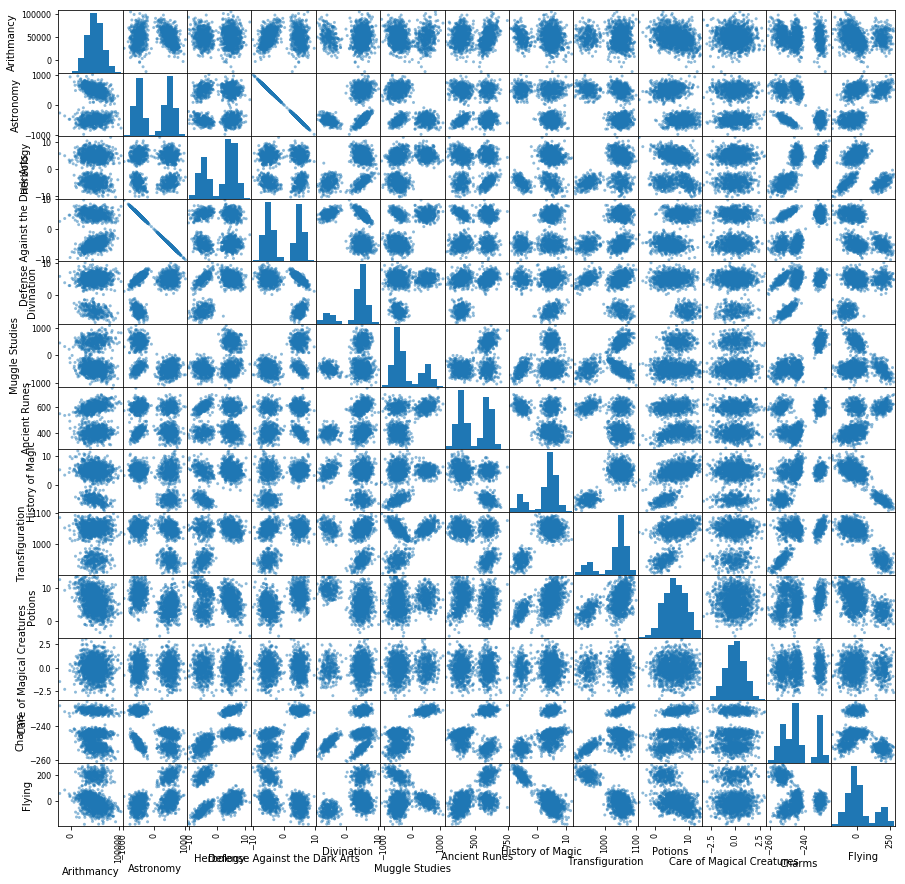

In [54]:
pd.plotting.scatter_matrix(df_train, figsize=(15,15))